## Plot Barotropic -> baroclinic conversion estimate
Sourcing the data produced by comp_TideConv_tpxo.py (e.g.), adapted from C. Vic code implementing [[St Laurent & Garrett 2002]] theory.

N.B.: for versions of comp_TideConv_* priori to February 6th 2018, Ef_t and Ef_a must be multiplied by a factor 2*pi. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap
import xarray as xr
import numpy as np

path_data = '/net/krypton/data0/project/vortex/lahaye/Tide_Conv/output_data/'
data_name = 'Ef_lucky_tpxo8_mpi.0?.nc'
agg_dim = 'xi'

nc = xr.open_mfdataset(path_data+data_name,concat_dim='xi')

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [26]:
lon = nc.variables['lon'].values
lat = nc.variables['lat'].values
topo = -nc.variables['h'].values
mask = topo<10

toplot = nc.variables['Ef_t']*2*np.pi

picdir = 'pictures/'

/usr/lib/python3/dist-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


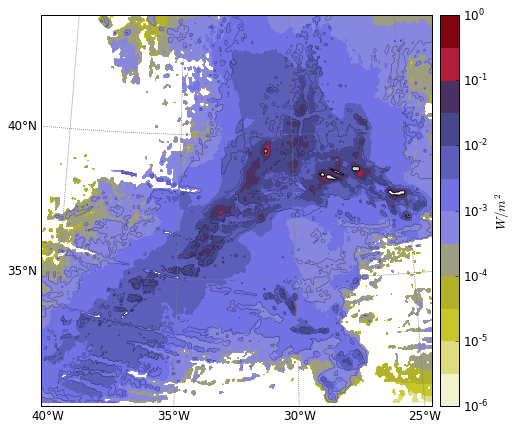

In [33]:
### parameters for plotting

fs       = 12
proj     = 'lcc'
res      = 'i'
stride   = 5
Lx,Ly    = 1500e3,1500e3 # extend in m
cmap = plt.get_cmap('gist_stern_r')
zlevs=[0,2000,3500]
topocol='k'     # isobath. contour color
grdcol='gray'   # grid color
mascale = "log" # 'linear'# 

if mascale == "linear":
    valmax = 0.1
    levels = np.linspace(0,valmax,11)
    levels[0] = levels[1]/2
elif mascale == 'log':
    valmin = 1e-6
    valmax = 1.0
    levels = np.logspace(np.log10(valmin),np.log10(valmax),13)

### do the plot
fig = plt.figure(figsize=(8,7))
ax = plt.subplot(111)
bm = Basemap(projection=proj,resolution=res,lon_0=lon.mean(),
        lat_0=lat.mean(),width=Lx,height=Ly)
xx, yy = bm(lon, lat)
bm.drawcoastlines(color='black')
bm.fillcontinents(color='white')
bm.drawparallels(np.arange(-60,70,stride),labels=[1,0,0,0],linewidth=0.8,\
                fontsize=fs,color=grdcol)
bm.drawmeridians(np.arange(-100,100,stride),labels=[0,0,0,1],linewidth=0.8,\
                fontsize=fs,color=grdcol)

bm.contour(xx,yy,topo,zlevs,colors=topocol,linewidths=0.5,alpha=0.5)
if mascale == 'linear':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot.values,mask),levels,cmap=cmap,extend='max',linestyles=None)
    hcb = bm.colorbar(hpc,extend="max")
    #hcb.set_ticks(np.r_[0,hcb.get_ticks()])
    hcb.formatter.set_powerlimits((-1, 1))
    #hcb.formatter.set_useMathText(True)
    hcb.update_ticks()
elif mascale == 'log':
    hpc = bm.contourf(xx,yy,np.ma.masked_array(toplot.values,mask),levels,cmap=cmap,norm = LogNorm(),linestyles=None)
    hcb = bm.colorbar(hpc)
for item in hpc.collections:
    item.set_rasterized('True')
hcb.ax.tick_params(labelsize=fs)

hcb.set_label(r'$W/m^2$',fontsize=fs+1)    
#plt.savefig(picdir+'Eft_LUCKY_TPXO8_{}.pdf'.format(mascale),magnification='auto',dpi=200,bbox_inches='tight')

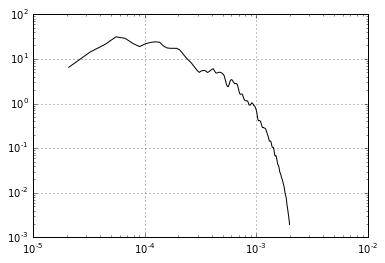

In [12]:
indx, indy = 250,250
kh = nc.variables['kh'].values
indk, = np.where(kh<=2e-3)
kh = kh[indk]
Efk = nc.variables['Ef_a'][indy,indx,indk].values*2*np.pi


plt.loglog(kh,Efk,'k')
plt.grid(True)

In [48]:
# Mean and total values
print('mean: {:.2f} mW/m^2'.format(np.nanmean(nc.variables['Ef_t'].values)*1e3*2*np.pi))   # mW/m^2
print('total: {:.2f} GW'.format(np.nansum(nc.variables['Ef_t'].values)*(750*4)**2/1e9*2*np.pi))   #GW

mean: 2.78 mW/m^2
total: 6.28 GW
